# Policy Based Methods

---

This notebook demonstrates the use of Deep-Reinforcement-Learning Policy Based Methods in OpenAI gym

In [1]:
import gym
import math
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import sys
sys.path.insert(0, '..') # enables the notebook to find the drl module

In [2]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()


### 1. Configure the environment

In [11]:
from os.path import expanduser
home = expanduser("~")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [12]:
from drl.pbm.training_agent import TrainingAgent, TrainingAgentProperties, Model
from openai.openai_env import EnvHelper

TRAIN_EPISODES = 400

### 2. Creating the agents
For this example we will create an agent with default configuration.

In [5]:
helper = EnvHelper(env_name='MountainCarContinuous-v0')
model = Model(helper.env)
agent = TrainingAgent(model, device) 

observation space: Box(2,)
action space: Box(1,)


### 3. Training the agents
We will now train the agents using the EnvHelper. With `helper.set_agent(agent_a)` we set the randomly selected `agent_a` as the training agent and then we rum the `TRAIN_EPISODES` number of training episodes.
We do the same steps with `agent_b`.
After each epoch the agent is saved under `saved/agent_name`. `agent_name`.
After the agents are trained we plot the mean reward avareged over one hundred steps.

In [6]:
helper.set_agent(agent)
helper.run_until(episodes=TRAIN_EPISODES, target_mean_reward=92.0)

Episode 1	Average Score: -9.86
Episode 2	Average Score: -4.97
Episode 3	Average Score: -3.35
Episode 4	Average Score: -2.63
Episode 5	Average Score: -2.21
Episode 6	Average Score: -1.87
Episode 7	Average Score: -2.07
Episode 8	Average Score: -1.95
Episode 9	Average Score: -1.95
Episode 10	Average Score: -1.80
Episode 11	Average Score: -1.68
Episode 12	Average Score: -1.82
Episode 13	Average Score: -2.23
Episode 14	Average Score: -2.14
Episode 15	Average Score: -2.08
Episode 16	Average Score: -2.53
Episode 17	Average Score: -2.52
Episode 18	Average Score: -2.92
Episode 19	Average Score: -2.89
Episode 20	Average Score: -3.08
Episode 21	Average Score: -3.03
Episode 22	Average Score: -2.94
Episode 23	Average Score: -2.88
Episode 24	Average Score: -2.78
Episode 25	Average Score: -2.93
Episode 26	Average Score: -2.90
Episode 27	Average Score: -2.91
Episode 28	Average Score: -2.83
Episode 29	Average Score: -2.80
Episode 30	Average Score: -2.98
Episode 31	Average Score: -2.95
Episode 32	Averag

Episode 253	Average Score: -1.64
Episode 254	Average Score: -1.59
Episode 255	Average Score: -1.55
Episode 256	Average Score: -1.51
Episode 257	Average Score: -1.52
Episode 258	Average Score: -1.49
Episode 259	Average Score: -1.49
Episode 260	Average Score: -1.38
Episode 261	Average Score: -1.36
Episode 262	Average Score: -1.36
Episode 263	Average Score: -1.33
Episode 264	Average Score: -1.31
Episode 265	Average Score: -1.24
Episode 266	Average Score: -1.21
Episode 267	Average Score: -1.23
Episode 268	Average Score: -1.23
Episode 269	Average Score: -1.24
Episode 270	Average Score: -1.25
Episode 271	Average Score: -0.38
Episode 272	Average Score: 0.52
Episode 273	Average Score: 0.46
Episode 274	Average Score: 1.42
Episode 275	Average Score: 2.40
Episode 276	Average Score: 3.37
Episode 277	Average Score: 4.33
Episode 278	Average Score: 5.30
Episode 279	Average Score: 6.24
Episode 280	Average Score: 7.17
Episode 281	Average Score: 8.09
Episode 282	Average Score: 8.95
Episode 283	Average S

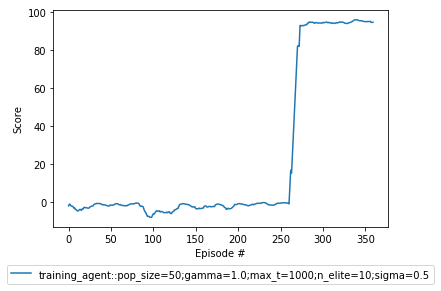

In [8]:
helper.show_plot(mode="average=10")

### 4. Testing the optimal agent
Now we load the optimal agent (saved under `saved\trained-MountainCarContinuous`) and test it.

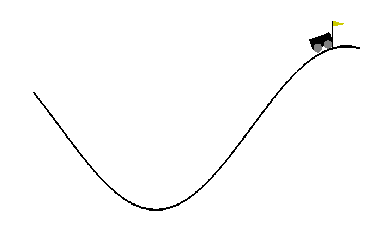

In [9]:
helper = EnvHelper()
agent = TrainingAgent(Model(helper.env), device) 
agent.load('saved', 'trained-MountainCarContinuous')
helper.set_agent(agent)
helper.show_sim_notebook()

### 4. CartPole environment
Now it is time to train and visualize an agent in CartPole-v0 environment

In [ ]:
helper = EnvHelper(env_name='CartPole-v0')
agent = TrainingAgent(Model(helper.env), device) 
helper.set_agent(agent)
helper.run_until(episodes=TRAIN_EPISODES, print_every=50, target_mean_reward=199)
helper.show_plot()

helper = EnvHelper(env_name='CartPole-v0')
agent = TrainingAgent(Model(helper.env), device) 
agent.load('saved')
helper.set_agent(agent)
helper.show_sim_notebook()

observation space: Box(4,)
action space: Discrete(2)
Episode 50	Average Score: 162.80
